In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

Veamos los dispositivos que aparecen cuando el micrófono interno está deshabilitado y también lo está el altavoz interno de la pc.

In [2]:
sd.query_devices()

  0 Asignador de sonido Microsoft - Input, MME (2 in, 0 out)
> 1 Micrófono (Dispositivo de High , MME (2 in, 0 out)
  2 Asignador de sonido Microsoft - Output, MME (0 in, 2 out)
< 3 Auriculares (Dispositivo de Hig, MME (0 in, 2 out)
  4 Headphones (Auricular de HD Audio), Windows WDM-KS (0 in, 2 out)
  5 Micrófono (Micrófono 2 de HD Audio), Windows WDM-KS (2 in, 0 out)
  6 Micrófono (Micrófono de HD Audio), Windows WDM-KS (2 in, 0 out)
  7 Speakers (Altavoz de HD Audio), Windows WDM-KS (0 in, 2 out)

Veamos ahora lo que pasa cuando se desconectan los dos micrófonos. Al deshabilitar el segund micrófono desaparece la entrada por micrófono en modalidad MME.

In [2]:
sd.query_devices()

  0 Asignador de sonido Microsoft - Output, MME (0 in, 2 out)
< 1 Auriculares (Dispositivo de Hig, MME (0 in, 2 out)
  2 Headphones (Auricular de HD Audio), Windows WDM-KS (0 in, 2 out)
  3 Micrófono (Micrófono 2 de HD Audio), Windows WDM-KS (2 in, 0 out)
  4 Micrófono (Micrófono de HD Audio), Windows WDM-KS (2 in, 0 out)
  5 Speakers (Altavoz de HD Audio), Windows WDM-KS (0 in, 2 out)

In [2]:
sd.query_devices()

  0 Asignador de sonido Microsoft - Output, MME (0 in, 2 out)
< 1 Altavoces (Dispositivo de High , MME (0 in, 2 out)
  2 Micrófono (Micrófono de HD Audio), Windows WDM-KS (2 in, 0 out)
  3 Speakers (Altavoz de HD Audio), Windows WDM-KS (0 in, 2 out)

In [73]:
sd.default.device = [4,5]

In [74]:
sd.query_devices()

  0 Asignador de sonido Microsoft - Input, MME (2 in, 0 out)
  1 Micrófono (Dispositivo de High , MME (2 in, 0 out)
  2 Asignador de sonido Microsoft - Output, MME (0 in, 2 out)
  3 Altavoces (Dispositivo de High , MME (0 in, 2 out)
> 4 Micrófono (Micrófono de HD Audio), Windows WDM-KS (2 in, 0 out)
< 5 Speakers (Altavoz de HD Audio), Windows WDM-KS (0 in, 2 out)

In [94]:
sd.default.samplerate=4*11025
sd.default.latency = ['high','high']

In [6]:
def Senoidal(Offs,Ampl,Freq,nPeriods):
    n=nPeriods
    SR = sd.default.samplerate
    t = np.linspace(0,n*np.divide(1,Freq),n*int(np.divide(SR,Freq)),endpoint=False) # valores de tiempo que van a ser barridos.
    return t,np.divide(Ampl*np.sin(2*np.pi*Freq*t)+Offs,1.6)

def PlaySin(Ampl,Freq,Time):
    t,y=Senoidal(Ampl,Freq,1)
    sd.play(y,loop=True)
    time.sleep(Time)
    sd.stop()

(0.2, 0.205)

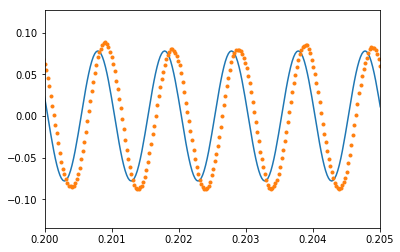

In [97]:
Freq = 1000
t,y=Senoidal(0,.25,Freq,300)


myrecording = sd.playrec(y, channels=1,blocking=True)

ch1=np.asarray([i[0] for i in myrecording])
#ch2=np.asarray([i[1] for i in myrecording])
tiempo = np.divide(np.arange(len(ch1)),sd.default.samplerate)
z=np.divide(y,2)
plt.plot(tiempo,z,'-')
plt.plot(tiempo,ch1,'.')
#plt.plot(tiempo,ch2,'.')
plt.xlim(0.2,0.205)

Interesante: cuando se usa la interface MME, no es posible enviar una señal y adquirir al mismo tiempo. Cuando se usa la interface WDM-KS es posible utilizar sin problemas la función de envío y reproducción simultánea. La clave está en la latencia. Por defecto, la librería genera alta latencia tanto en la entrada como en la salida. Dado que los drivers WDM tienen una menor latencia que los MME, al tener alta latencia por defecto, los tiempos no dan para adquirir la señal que se envía. Por eso cuando se setea la latencia a nivel bajo, inmediatamente se logra realizar la medición. De todas maneras, se aconseja usar los drivers WDM, porque la alta latencia permite mayor robustez en el sistema.

In [55]:
sd.default.prime_output_buffers_using_stream_callback

False

In [98]:
(freq,ampl,off) = np.loadtxt('respuesta_input_placa.out')

OSError: respuesta_input_placa.out not found.

In [102]:
np.savetxt

<function numpy.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)>